In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-complaint-database/rows.csv


In [3]:
import pandas as pd
df=pd.read_csv('/kaggle/input/consumer-complaint-database/rows.csv')

/tmp/ipykernel_15/1084837552.py:2: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/consumer-complaint-database/rows.csv')


In [4]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282350,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,"CITIBANK, N.A.",MO,63301,NaN,NaN,Web,12/02/2011,Closed with relief,Yes,No,2396
1282351,12/01/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",OH,45248,NaN,NaN,Web,12/06/2011,Closed without relief,No,No,2323
1282352,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126
1282353,12/01/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,80920,NaN,NaN,Web,12/01/2011,Closed with relief,Yes,No,2315


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282355 entries, 0 to 1282354
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1282355 non-null  object
 1   Product                       1282355 non-null  object
 2   Sub-product                   1047189 non-null  object
 3   Issue                         1282355 non-null  object
 4   Sub-issue                     751169 non-null   object
 5   Consumer complaint narrative  383564 non-null   object
 6   Company public response       449082 non-null   object
 7   Company                       1282355 non-null  object
 8   State                         1262955 non-null  object
 9   ZIP code                      1167057 non-null  object
 10  Tags                          175643 non-null   object
 11  Consumer consent provided?    690654 non-null   object
 12  Submitted via                 1282355 non-

In [6]:
df.Product.value_counts()

Product
Mortgage                                                                        278098
Debt collection                                                                 244873
Credit reporting, credit repair services, or other personal consumer reports    225978
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     51685
Credit card or prepaid card                                                      47653
Checking or savings account                                                      40641
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11377
Money transfer, virtual currency, o

In [7]:
# label Grouping or consolidation
df.loc[df['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df.loc[df['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df.loc[df['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df.loc[df['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df = df[df.Product != 'Other financial service']

<Axes: title={'center': 'Number complaints in each product'}, xlabel='Product', ylabel='Number of Complaints'>

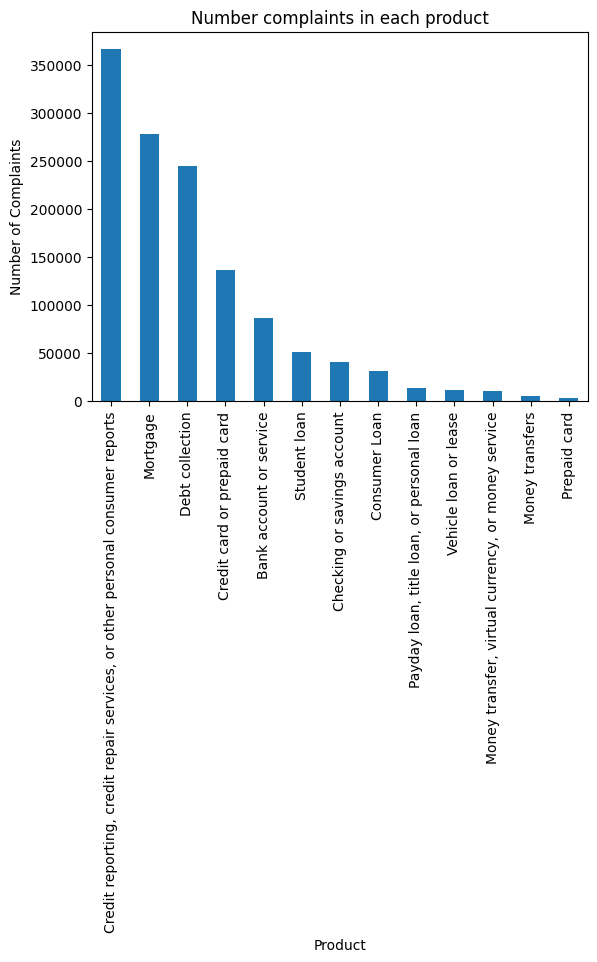

In [8]:
df['Product'].value_counts().sort_values(ascending=False).plot(kind='bar', ylabel='Number of Complaints', 
                                                                title='Number complaints in each product')

# Text Preprocessing

In [9]:
def print_plot(index):
    example = df[df.index == index][['Consumer complaint narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_plot(10)

nan
Product: Vehicle loan or lease


In [10]:
df[df.index == 118][['Consumer complaint narrative', 'Product']].values[0]

array([nan, 'Mortgage'], dtype=object)

In [11]:
pd.DataFrame(df['Consumer complaint narrative'].value_counts())

count
Consumer complaint narrative                             
There are many mistakes appear in my report wit...    978
Equifax mishandled my information which has led...    118
I have been a victim of identity theft.               104
I am filing this complaint because Experian has...    103
( a ) Block. Except as otherwise provided in th...     77
...                                                   ...
I have asked Santander Consumer, USA NUMEROUS t...      1
When I was first notified of this fraudulent de...      1
Commonwealth Financial systems a 3rd party coll...      1
XXXX had been my cellular carrier since XX/XX/X...      1
I currently have a mortgage with Flag star bank...      1

[366654 rows x 1 columns]

In [12]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:0000:010:01
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/1f/5c/374ac3fa3c7ed9a967ad273a5e841897ef6b10aa6aad938ff10717a3e2a3/regex-2023.8.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 38.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import re
from nltk.corpus import stopwords

df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text



In [16]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: clean_text(str(x)))

In [17]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

In [18]:
df['Consumer complaint narrative'][34000]

'nan'

In [19]:
df=df[['Consumer complaint narrative','Product']]


In [20]:
df.dropna()

,Consumer complaint narrative,Product
0,nan,Checking or savings account
1,nan,Checking or savings account
2,nan,Debt collection
3,nan,"Credit reporting, credit repair services, or o..."
4,nan,Checking or savings account
...,...,...
1281291,nan,Credit card or prepaid card
1281292,nan,Mortgage
1281293,nan,Credit card or prepaid card
1281294,nan,Mortgage


In [21]:
df=df[df['Consumer complaint narrative']!='nan']

In [22]:
df.reset_index(inplace=True)

In [23]:
df=df[['Consumer complaint narrative','Product']]

In [24]:
pd.DataFrame(df['Consumer complaint narrative'].value_counts())

,count
Consumer complaint narrative,
many mistakes appear report without understanding,979
equifa mishandled information led breach puts millions others potential risk etremely disappointed equifa handled reporting breach little done notify public nearly month breach detected received email letter phone call instead discover via social media,158
victim identity theft,139
creditor reporting accounts invalid unverified investigated account concluded account matching records assigned would like proof accounts disputed per fcra fdcpa causing anguish slandering good name please block account report breathe,137
block ecept otherwise provided section consumer reporting agency shall block reporting information file consumer consumer identifies information resulted alleged identity theft later 4 business days date receipt agency 1 appropriate proof identity consumer 2 copy identity theft report 3 identification information consumer 4 statement consumer information information relating transaction consumer b notification consumer reporting agency shall promptly notify furnisher information identified consumer subsection section 1 information may result identity theft 2 identity theft report filed 3 block requested section 4 effective dates block c authority decline rescind 1 general consumer reporting agency may decline block may rescind block information relating consumer section consumer reporting agency reasonably determines information blocked error block requested consumer error b information blocked block requested consumer basis material misrepresentation fact consumer relevant request block c consumer obtained possession goods services money result blocked transaction transactions 2 notification consumer block information declined rescinded subsection affected consumer shall notified promptly manner consumers notified reinsertion information section 1681i 5 b title 3 significance block purposes subsection consumer reporting agency rescinds block presence information file consumer prior blocking information evidence whether consumer knew known consumer obtained possession goods services money result block eception resellers 1 reseller file section shall apply consumer reporting agency consumer reporting agency reseller b time request consumer subsection section otherwise furnishing reselling consumer report concerning information identified consumer c informs consumer means consumer may report identity theft bureau obtain consumer information regarding identity theft 2 reseller file sole obligation consumer reporting agency section regard request consumer section shall block consumer report maintained consumer reporting agency subsequent use consumer accordance provisions subsection section identifies consumer reporting agency information file consumer resulted identity theft b consumer reporting agency reseller identified information 3 notice carrying obligation paragraph 2 reseller shall promptly provide notice consumer decision block file notice shall contain name address telephone number consumer reporting agency consumer information obtained resale e eception verification companies provisions section apply check services company acting issues authorizations purpose approving processing negotiable instruments electronic fund transfers similar methods payments ecept beginning 4 business days receipt information described paragraphs 1 3 subsection section check services company shall report national consumer reporting agency described section 1681a p title information identified subject identity theft report resulting identity theft f access blocked information law enforcement agencies provision section shall construed requiring consumer reporting agency prevent federal state local law enforcement agency accessing blocked information consumer file agency could otherwise obtain access subchapter,126
...,...
following sequence events payment amount 22000 made insurance credit card ending called put hold payment amount 22000 thoug

In [25]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Consumer complaint narrative'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

D0906 18:00:29.042474474      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0906 18:00:29.042501686      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0906 18:00:29.042522896      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0906 18:00:29.042526246      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0906 18:00:29.042528821      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0906 18:00:29.042532492      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0906 18:00:29.042535308      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0906 18:00:29.

Found 159939 unique tokens.


In [26]:
word_index

{'credit': 1,
 'account': 2,
 'would': 3,
 'payment': 4,
 'loan': 5,
 'report': 6,
 'information': 7,
 'debt': 8,
 'bank': 9,
 'told': 10,
 'received': 11,
 'company': 12,
 'time': 13,
 'called': 14,
 'card': 15,
 'never': 16,
 'payments': 17,
 'sent': 18,
 'letter': 19,
 'pay': 20,
 'back': 21,
 'mortgage': 22,
 'get': 23,
 'also': 24,
 'paid': 25,
 'call': 26,
 'nt': 27,
 'said': 28,
 'reporting': 29,
 'amount': 30,
 'made': 31,
 'due': 32,
 'could': 33,
 'one': 34,
 'number': 35,
 'phone': 36,
 'money': 37,
 'days': 38,
 'balance': 39,
 'asked': 40,
 'since': 41,
 'still': 42,
 'late': 43,
 'collection': 44,
 'accounts': 45,
 'even': 46,
 'date': 47,
 'years': 48,
 'home': 49,
 'make': 50,
 'interest': 51,
 'us': 52,
 'month': 53,
 'name': 54,
 'dispute': 55,
 'contacted': 56,
 'please': 57,
 'check': 58,
 'request': 59,
 'months': 60,
 'service': 61,
 'file': 62,
 'help': 63,
 'times': 64,
 'new': 65,
 'address': 66,
 'complaint': 67,
 'day': 68,
 'know': 69,
 'consumer': 70,
 'rem

In [27]:
from keras.utils import pad_sequences
X = tokenizer.texts_to_sequences(df['Consumer complaint narrative'].values)

In [28]:
df['Consumer complaint narrative'][0]

'summer 2018 denied mortgage loan due charge credit card mailed account validation letter disputed debt credit bureaus credit card company several times credit bureaus responded debt verified showed proof requested still responded letters since 2018 asked credit bureaus show verified debt sent proof debt bill could fabricated really need know havent shown proof multiple disputes certified letters letters sent'

In [29]:
X[0]

[2581,
 165,
 284,
 22,
 5,
 32,
 111,
 1,
 15,
 436,
 2,
 328,
 19,
 150,
 8,
 1,
 114,
 1,
 15,
 12,
 82,
 64,
 1,
 114,
 470,
 8,
 251,
 609,
 100,
 80,
 42,
 470,
 232,
 41,
 165,
 40,
 1,
 114,
 285,
 251,
 8,
 18,
 100,
 8,
 103,
 33,
 4329,
 534,
 83,
 69,
 1337,
 1088,
 100,
 252,
 584,
 376,
 232,
 232,
 18]

In [31]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (383272, 250)


In [32]:
X

array([[   0,    0,    0, ...,  232,  232,   18],
       [   0,    0,    0, ...,    6,   84,  926],
       [   0,    0,    0, ...,    6,   84,  926],
       ...,
       [   0,    0,    0, ..., 1198,   19, 1506],
       [   0,    0,    0, ...,   96,   16,   43],
       [   0,    0,    0, ...,  901,    5,  327]], dtype=int32)

In [33]:
Y = pd.get_dummies(df['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (383272, 13)


In [34]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(344944, 250) (344944, 13)
(38328, 250) (38328, 13)


In [36]:
from keras.models import Sequential 
from keras.layers import Activation, Dense,LSTM,Embedding,Dropout
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
4851/4851 [==============================] - 1231s 253ms/step - loss: 0.8699 - accuracy: 0.7283 - val_loss: 0.6368 - val_accuracy: 0.7861
Epoch 2/5
4851/4851 [==============================] - 1229s 253ms/step - loss: 0.5711 - accuracy: 0.8023 - val_loss: 0.5455 - val_accuracy: 0.8089
Epoch 3/5
4851/4851 [==============================] - 1229s 253ms/step - loss: 0.4911 - accuracy: 0.8298 - val_loss: 0.5141 - val_accuracy: 0.8257
Epoch 4/5
4851/4851 [==============================] - 1229s 253ms/step - loss: 0.4293 - accuracy: 0.8538 - val_loss: 0.5024 - val_accuracy: 0.8307
Epoch 5/5
4851/4851 [==============================] - 1230s 254ms/step - loss: 0.3818 - accuracy: 0.8709 - val_loss: 0.5140 - val_accuracy: 0.8304


In [37]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1198/1198 [==============================] - 50s 42ms/step - loss: 0.5125 - accuracy: 0.8319
Test set
  Loss: 0.512
  Accuracy: 0.832


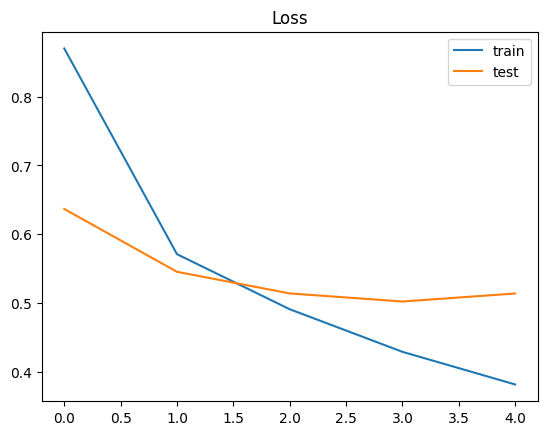

In [38]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

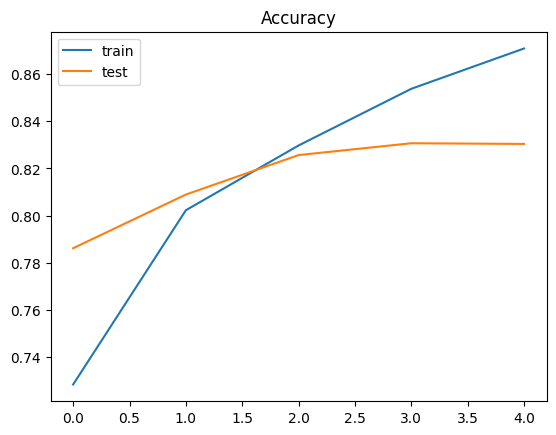

In [41]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [39]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 319ms/step
[[2.3801334e-01 4.7094361e-03 2.3350539e-02 5.8501381e-01 7.8030221e-02
  1.1008117e-02 4.7903441e-04 3.3325149e-04 5.5033982e-02 2.1962007e-03
  5.2950246e-04 5.3420838e-04 7.6840626e-04]] Credit card or prepaid card
